## Dragon real state -price predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("ML project housing data.csv") 

In [3]:
housing.head()   #showing top5 rows   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

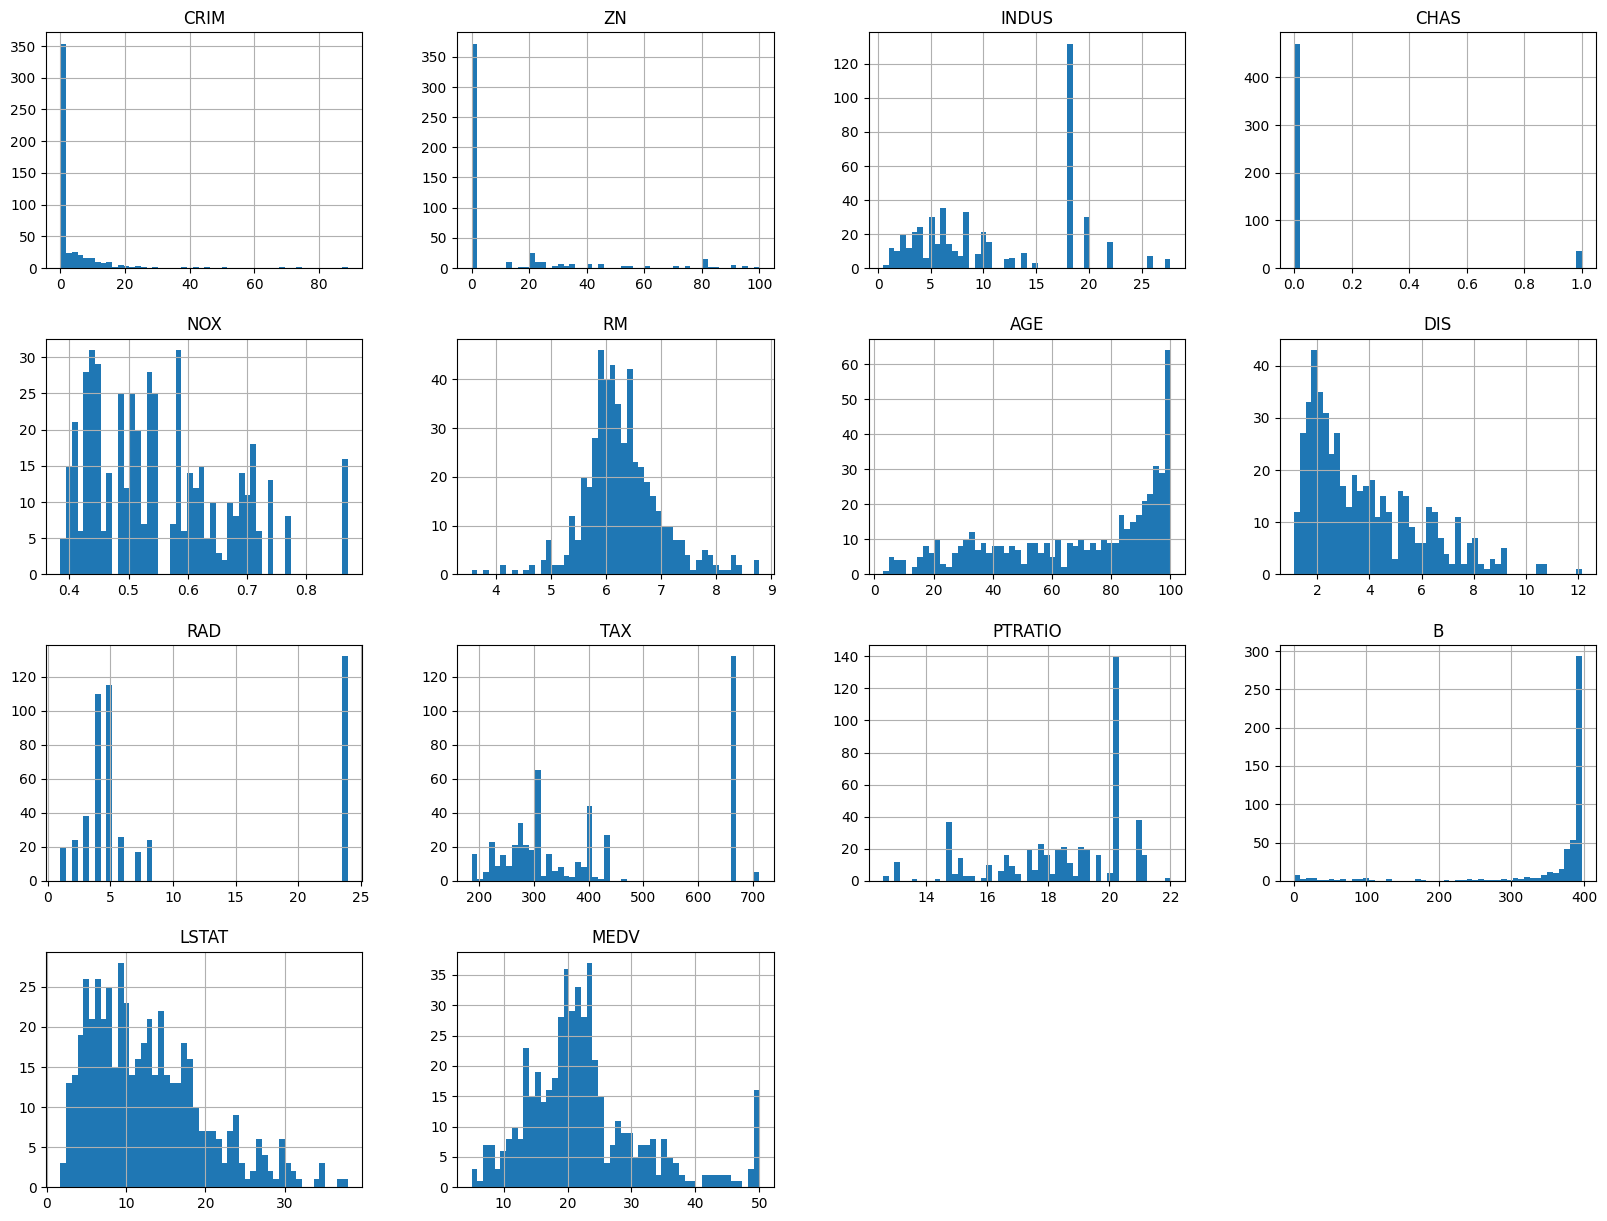

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## train-test splitting

In [9]:
import numpy as np                                           
def split_train_test(data, test_ratio):                      
    np.random.seed(42)                                        
    shuffled=np.random.permutation(len(data))                
    #print(shuffled)                                        
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

before putting line np.random.seed(42), shuffled generated random everytime which would also randomly include test data which is not intended to be revealed because its for testing only and not for training but now with this line its same everytime

In [10]:
train_set,test_set=split_train_test(housing,0.2)   #instead of train_set it may be train_indices and below also

In [11]:
print(f"Rows in train_set: {len(train_set)}\nRows in test_set: {len(test_set)}\n")

Rows in train_set: 405
Rows in test_set: 101



In [12]:
from sklearn.model_selection import train_test_split      
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train_set: {len(train_set)}\nRows in test_set: {len(test_set)}\n")

Rows in train_set: 404
Rows in test_set: 102



due to above import statement input lines 9,10 and 11 are not needed because now it is done by sklearn module only

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit   
s=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in s.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

if input line 12 is only followed then it would straight away take top 20% of data for test and for 'CHAS' value 20% would take initial 101 data but infact starting 143 values of 'CHAS' are 0 and then 1 values can be found so testing or training without all possible values would result in bad model so StratifiedShuffleSplit is required to include every type of data in tests or train in equal ratio

In [14]:
strat_test_set['CHAS'].value_counts()    

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
95/7

13.571428571428571

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
376/28

13.428571428571429

ratio in both train and test is same. so CHAS value of 0 and 1 are divided in same ratio in training and testing

In [18]:
housing= strat_train_set.copy()

## Looking for Correlations

In [19]:
corr_matrix=housing.corr()  #corr is function of pandas DataFrame

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

strong positive correleation means if 1 value increases then other value will also increase which is seen in MEDV, RM which is close to 1 and Strong negative correlation is opposite. Pierson correlation values lie between -1 to 1 which can be senn in above data

In [21]:
# from pandas.plotting import scatter_matrix
# attributes=['MEDV', 'RM', 'ZN', 'LSTAT']
# scatter_matrix(housing[attributes], figsize=(12,8))    #commented bcz running all takes time

<Axes: xlabel='RM', ylabel='MEDV'>

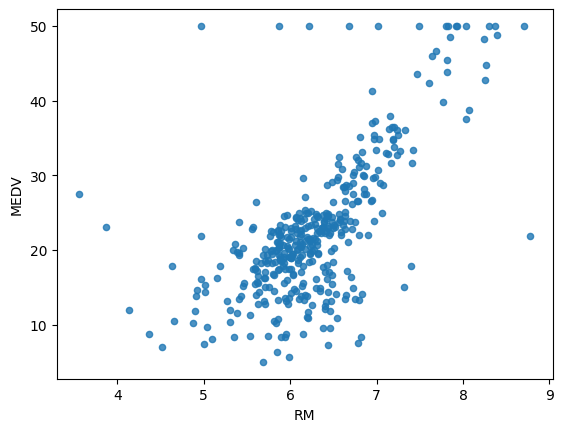

In [22]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8) #instead of single it could be double inverted commas,alpha=thickness

## Trying out attribute combinations

In [23]:
housing['TAX_RM']=housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_RM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAX_RM    -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAX_RM', ylabel='MEDV'>

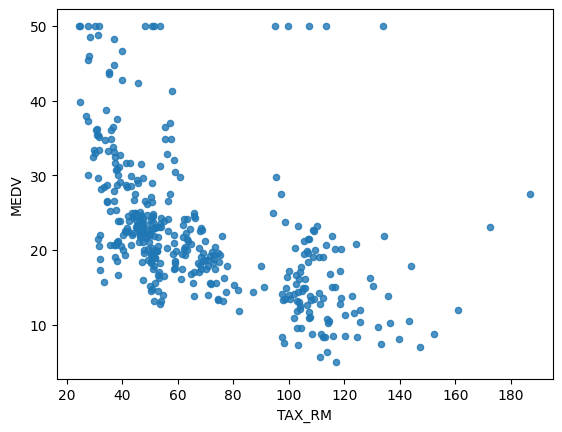

In [25]:
housing.plot(kind='scatter', x='TAX_RM', y='MEDV', alpha=0.8)

In [26]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## Missing attributes

To take care of missing attributes we have three options:
1) Get rid of missing data points
2) Get rid of whole attributes(whole column like for CHAS which seems not important as its correlation is close to 0 as in In(23) CHAS=0.175260)
3) set the missing data points with some value(like 0,mean or median)

5 values of RM has been deleted from excel pdf which can be seen in IN[4]

In [27]:
a=housing.dropna(subset=['RM'])    #option 1
#housing.dropna(how='any')      -this line will remove all rows with missing data but above will remove only in RM column
a.shape  #original housing DataFrame will remain unchanged

(399, 13)

In [28]:
housing.drop("RM", axis=1).shape   #original housing DataFrame will remain unchanged

(404, 12)

In [29]:
median=housing['RM'].median()
housing['RM'].fillna(median)
#housing.fillna(value=housing['RM'].median())  -this line will fill all empty values but above line will do only in RM column 
#original housing DataFrame will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)           #this imputer will fit median not only in missing data of RM column but in whole housing data

SimpleImputer(strategy='median')

In [32]:
housing.describe()   #till now RM is 399 not 404 with 5 missing data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
imputer.statistics_.shape

(13,)

In [35]:
X=imputer.transform(housing)   #till now RM is 501 only not 506 with 5 missing data

In [36]:
housing_transform=pd.DataFrame(X, columns=housing.columns)

In [37]:
housing_transform.describe()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


 here RM is 404 with median filled because of imputing which will fill median if coming test value is also empty
 is any columns because of imputer

In [38]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

primarily three types of objects:
1) Estimator - It estimates some parameter based on DataSet. eg-Imputer. It has fit method and transform method. 
Fit method- fits the dataset and calculates internal parameter

2) Transformers - It takes input and returns output based on learning from fit(). It also has a convenience function called fit_transform() which fits and then transforms 

3) Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature scaling

Mainly, there are two types of feature scaling method:
1) Min-Max scaing (Normalization)
    (value - min)/(max - min)   - this will scale all graph between range 0 and 1
    Sklearn provides a scaler called MinMaxScaler for this
    
2) Standardization
    (value - mean)/std deviation
    Sklearn provides a scaler called StandardScaler for this

## Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    #.....add as many as you want in your pipeline
    ('std_scaler' ,StandardScaler()),
])

In [40]:
housing_num_tr=my_pipeline.fit_transform(housing)  

In [41]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Dragon Real Estates

In [42]:
housing_num_tr.shape

(404, 13)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model= DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [44]:
some_data= housing.iloc[:5]   #from here prediction of prepared model is done

In [45]:
some_labels= housing_labels.iloc[:5]

In [46]:
prepared_data= my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([22.463, 25.471, 16.331, 23.488, 23.459])

In [48]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse= mean_squared_error(housing_labels, housing_predictions)   #before using dragonTree its name was lin_mse -linearRegression
rmse = np.sqrt(mse)

In [51]:
rmse  #with linearRegre. more error came so used dragonTree in In[43] but now 0 error so its overfitting not suitable again

1.1634295517057218

we must not touch test data till our model is finally selected and launched

## Using better evaluation techniques - Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([2.77806021, 2.72924632, 4.37720047, 2.53091732, 3.3315517 ,
       2.6303775 , 4.76386489, 3.33641865, 3.34755642, 3.19442273])

In [54]:
def print_scores (scores):
    print("scores: ",scores)
    print("mean: ",scores.mean())
    print("standard deviation: ",scores.std())

In [55]:
print_scores(rmse_scores)

scores:  [2.77806021 2.72924632 4.37720047 2.53091732 3.3315517  2.6303775
 4.76386489 3.33641865 3.34755642 3.19442273]
mean:  3.301961620269954
standard deviation:  0.7040608050208857


Model outputs
1) with Linear regression model:
    mean:  5.037482786117751,
    standard deviation:  1.059438240560695
    
2) with DecisionTree Model:
    mean:  4.271935999042942,
    standard deviation:  0.7775257916406063
    
3) with RandomForest model:
    mean:  3.301961620269954
    standard deviation:  0.7040608050208857

Convert this notebook into python file and run this pipeline using Visual studio code

## Saving the Model

In [56]:
from joblib import dump, load
dump(model, "DragonRealEstate.joblib")

['DragonRealEstate.joblib']

## Testing model on test data

In [58]:
X_test = strat_test_set.drop('MEDV', axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse =mean_squared_error(Y_test, final_predictions)
final_rmse =np.sqrt(final_mse)

In [62]:
print_scores(final_rmse)

scores:  2.913198895359115
mean:  2.913198895359115
standard deviation:  0.0


Above test results show 2.91 mean which is even lesser than our chosen model of RandomForest having mean of 3.3. S, model fine

In [63]:
print(final_predictions, list(Y_test))  #below output shows final predictions -for 24.636-16.5,11.696-10.2,25.435-30.1......

[24.637 11.696 25.435 22.013 18.188 15.052 19.831 14.427 31.3   40.715
 19.706 11.587 24.298 28.685 19.656 10.544 31.726 14.588 23.659 18.914
 19.812 18.084 17.296 22.052 17.981 30.7   16.29  32.668  8.753 33.763
 23.782 21.386 22.82  10.995 21.027 11.303 42.768 24.328 23.043 41.461
 24.029 29.58  20.631 21.013 19.443 33.508 44.404 20.211 20.374 21.698
 21.432 14.472 20.986 14.956 24.906 32.639 42.928 28.455 19.114 20.957
 47.412 10.018 18.818 24.396 14.954 32.847 19.235 18.034 18.976 34.217
 27.133 22.737 21.519 22.156 35.134 12.732 15.837 20.023 20.817 21.461
 22.28  21.374 14.354 22.709 20.723 21.144 13.987 21.341 21.319 23.483
 18.869 27.295  7.133 26.128 19.02  29.97  19.783 31.244 14.513 26.362
 20.883 19.993] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [65]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the Model

In [66]:
from joblib import dump,load
import numpy as np
model= load("DragonRealEstate.joblib")

In [67]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])  #by putting one more [] this array converted into 2D array
model.predict(features)   #in these many features, changing anyone could also change ouput below which is price predicted

array([22.463])